In [1]:
! tree -h ../data/trial_0

../data/trial_0
├── [ 376]  NOTES.md
├── [3.0K]  edges.csv
├── [1.9K]  mapping.csv
└── [243K]  ts.csv

0 directories, 4 files


In [4]:
! cat ../data/trial_0/NOTES.md

# Trial 0
This dataset is an initial experiment with training format. It contains 3 
files: `edges`, `ts`, and `mapping`. The edges file is an edgelist for the 
graph. `ts` is the timeseries, with the first column being the page_id 
and the rest of the columns the daily pagecount starting at 2018-01-01. 
The mapping translates the page id to a title.

The matrix is 82x609.


In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

ts = pd.read_csv("../data/trial_0/ts.csv")
g = nx.from_pandas_edgelist(
    pd.read_csv('../data/trial_0/edges.csv'), 
    source="src", 
    target="dst"
)

In [15]:
ts.head()

,page_id,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,...,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31,2019-09-01
0,10522749,165.0,209.0,279,236,222.0,217.0,204.0,353,265.0,...,148.0,126.0,116.0,139.0,175.0,164.0,169.0,178.0,150.0,157.0
1,51097,167.0,191.0,206,190,185.0,187.0,159.0,260,241.0,...,144.0,109.0,137.0,159.0,164.0,150.0,158.0,132.0,154.0,135.0
2,224463,107.0,120.0,124,157,111.0,131.0,119.0,126,114.0,...,NaN,NaN,NaN,138.0,121.0,139.0,113.0,120.0,113.0,113.0
3,27681,400.0,489.0,534,534,477.0,467.0,476.0,610,687.0,...,350.0,296.0,319.0,417.0,399.0,409.0,377.0,625.0,342.0,314.0
4,1339871,NaN,157.0,175,185,171.0,192.0,194.0,210,179.0,...,179.0,149.0,187.0,146.0,163.0,189.0,262.0,234.0,290.0,240.0


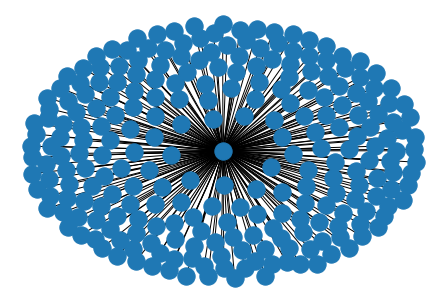

In [16]:
nx.draw(g)

In [39]:
X = ts.iloc[:,1:].fillna(0).values
X

array([[ 165.,  209.,  279., ...,  178.,  150.,  157.],
       [ 167.,  191.,  206., ...,  132.,  154.,  135.],
       [ 107.,  120.,  124., ...,  120.,  113.,  113.],
       ...,
       [ 770., 1699., 1201., ..., 1749., 1554., 1848.],
       [1374., 1698., 1826., ..., 1307., 1032., 1066.],
       [ 652., 1080., 1304., ...,  580.,  461.,  536.]])

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.63095115 0.19720332]
[287690.80309702 160836.72499898]


In [51]:
reduced = pca.fit_transform(X)

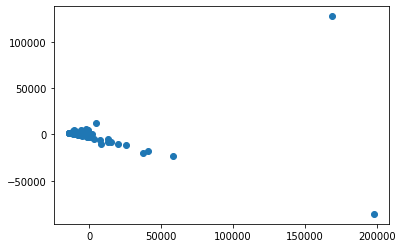

In [68]:
x, y = map(list, zip(*reduced))
plt.scatter(x, y)